##### 090200354, Beyza Kopuz

**Task 1:** Find a data set which is suitable for regression analysis and consists of at least 6-7 numerical features only. 
Check for possible multicollinearity problems in the data set and remedy this problem if it exists.
Then, apply feature selection algorithms to find the best subset. Explain the reason (give support) why you picked that model as the final one.

#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.

## Data Decription

- Import and introduce your data set here.

In [35]:
import pandas as pd

In [36]:
concrete = pd.read_csv(r'C:\Users\beyza\OneDrive\Masaüstü\datasets\ConcreteStrengthData.csv')
concrete

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


This 'ConcreteStrengthData' data set can be found in the 'datasets' folder and on the References list at the end of this notebook.
This data set contains 9 columns and 1030 rows. 

The description of the column names are as follows:
- CementComponent: Amount of cement is mixed.
- BlastFurnaceSlag: Amount of Blast Furnace Slag is mixed.
- FlyAshComponent: Amount of FlyAsh is mixed.
- WaterComponent: Amount of water is mixed.
- SuperplasticizerComponent: Amount of Super plasticizer is mixed.
- CoarseAggregateComponent: Amount of Coarse Aggregate is mixed.
- FineAggregateComponent: Amount of Coarse Aggregate is mixed.
- AgeInDays: How many days it was left dry?
- Strength: What was the final strength of concrete? (This is the target variable.)

In [37]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


#### Dropping NaN values and duplicates.

In [38]:
concrete = concrete.dropna()
concrete = concrete.drop_duplicates()

In [39]:
concrete

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [40]:
concrete.shape

(1005, 9)

In [41]:
#reassigning the indexes after dropping the rows with NaN values.
concrete.index = range(1005)

## Multicollinearity Check

- Check possible multicollinearity issues here and remedy it (if exists) here.

In [42]:
#data splitting before performing any further because we don't want data leakage.
concrete_X = concrete.drop(columns=["Strength"], axis=1) #dropping the 'Strength' column because it is the target variable.
concrete_y= concrete['Strength']

#split the data 80:20
from sklearn.model_selection import train_test_split
concrete_X_train, concrete_X_test, concrete_y_train, concrete_y_test = train_test_split(concrete_X, concrete_y, test_size=0.2, random_state=2002)

In [43]:
concrete_X_train.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
176,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,14
549,316.1,210.7,0.0,185.7,0.0,977.0,689.3,28
866,151.0,0.0,185.0,167.0,16.0,1074.0,678.0,28
636,116.0,173.0,0.0,192.0,0.0,909.8,891.9,90
601,307.0,0.0,0.0,193.0,0.0,968.0,812.0,90


In [44]:
#calculate the correlations between 8 features to check for multicollinearity issues.
R = concrete_X_train.corr() #R is the sample correlation matrix
R

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
CementComponent,1.000000,-0.297652,-0.376013,-0.061717,0.068316,-0.091130,-0.261347,0.089081
BlastFurnaceSlag,-0.297652,1.000000,-0.326631,0.141300,0.002812,-0.266611,-0.309458,-0.059571
FlyAshComponent,-0.376013,-0.326631,1.000000,-0.286417,0.422354,-0.029344,0.102516,-0.146432
WaterComponent,-0.061717,0.141300,-0.286417,1.000000,-0.640298,-0.236191,-0.412586,0.237565
SuperplasticizerComponent,0.068316,0.002812,0.422354,-0.640298,1.000000,-0.220105,0.172152,-0.168456
CoarseAggregateComponent,-0.091130,-0.266611,-0.029344,-0.236191,-0.220105,1.000000,-0.151018,-0.001176
FineAggregateComponent,-0.261347,-0.309458,0.102516,-0.412586,0.172152,-0.151018,1.000000,-0.116583
AgeInDays,0.089081,-0.059571,-0.146432,0.237565,-0.168456,-0.001176,-0.116583,1.000000


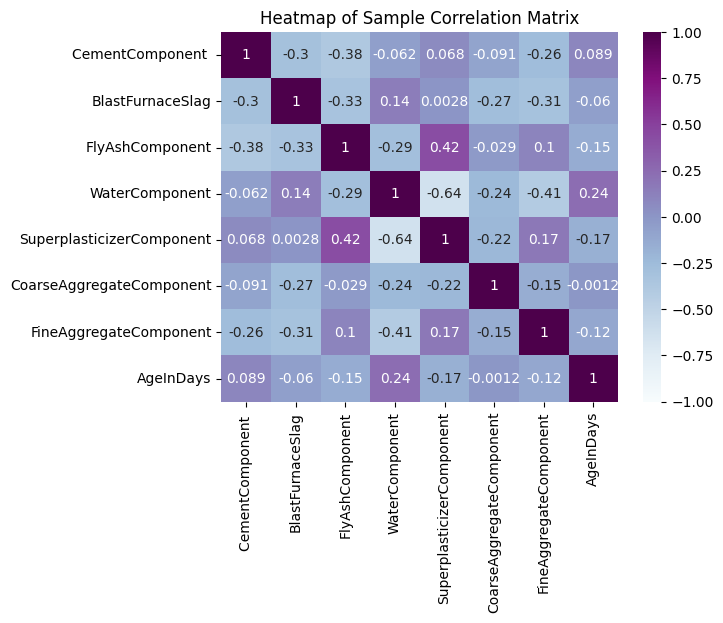

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(R, vmin=-1, vmax=1, cmap='BuPu', annot=True)
plt.title('Heatmap of Sample Correlation Matrix')
plt.show();

All values are lower than 0.80, it looks like there is no multicollinearity issue but I am going to check the VIF values as well just in case. 
If the variance inflation factor is higher than 10 it means that there is a serious multicollinearity problem.
If the variance inflation factor is between 5 and 10, it means that there is a moderate multicollinearity problem.
I am going to remove the attributes which has VIFs greater than 5 from the model. 

In [46]:
#Adding a column of ones because I will need it to calculate the VIF values.
concrete_X_train["intercept"]=1
concrete_X_train.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,intercept
176,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,14,1
549,316.1,210.7,0.0,185.7,0.0,977.0,689.3,28,1
866,151.0,0.0,185.0,167.0,16.0,1074.0,678.0,28,1
636,116.0,173.0,0.0,192.0,0.0,909.8,891.9,90,1
601,307.0,0.0,0.0,193.0,0.0,968.0,812.0,90,1


In [48]:
vif_df = pd.DataFrame() #create an empty data frame
vif_df["feature"] = concrete_X_train.columns  #attach a column named feature which involves feature names of X df
vif_df["VIF_value"] = 0
vif_df

,feature,VIF_value
0,CementComponent,0
1,BlastFurnaceSlag,0
2,FlyAshComponent,0
3,WaterComponent,0
4,SuperplasticizerComponent,0
5,CoarseAggregateComponent,0
6,FineAggregateComponent,0
7,AgeInDays,0
8,intercept,0


#### Now, I am going to calculate the VIF value for each feature and fill in the table.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(len(concrete_X_train.columns)):
    vif_df.loc[i, 'VIF_value'] = variance_inflation_factor(concrete_X_train.values, i)
    
vif_df

,feature,VIF_value
0,CementComponent,7.497335
1,BlastFurnaceSlag,7.368839
2,FlyAshComponent,6.019432
3,WaterComponent,6.583854
4,SuperplasticizerComponent,2.810306
5,CoarseAggregateComponent,4.953658
6,FineAggregateComponent,6.804964
7,AgeInDays,1.094811
8,intercept,6605.460003


In [50]:
vif_df.sort_values("VIF_value", ascending=False, inplace=True)
vif_df

,feature,VIF_value
8,intercept,6605.460003
0,CementComponent,7.497335
1,BlastFurnaceSlag,7.368839
6,FineAggregateComponent,6.804964
3,WaterComponent,6.583854
2,FlyAshComponent,6.019432
5,CoarseAggregateComponent,4.953658
4,SuperplasticizerComponent,2.810306
7,AgeInDays,1.094811


Ignoring the intercept row, I am going to drop the features that has greater than 5 VIF value from the data set.

In [56]:
Xtrain_new = concrete_X_train.drop(columns=["CementComponent "], axis=1)
Xtrain_new.head()

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,intercept
176,0.0,125.4,162.1,7.8,1090.0,804.0,14,1
549,210.7,0.0,185.7,0.0,977.0,689.3,28,1
866,0.0,185.0,167.0,16.0,1074.0,678.0,28,1
636,173.0,0.0,192.0,0.0,909.8,891.9,90,1
601,0.0,0.0,193.0,0.0,968.0,812.0,90,1


Calculating VIFs again without the 'CementComponent ' feature.

In [58]:
vifnew_df = pd.DataFrame() 
vifnew_df["feature"] = Xtrain_new.columns 
vifnew_df["VIF_value"] = 0
for i in range(len(Xtrain_new.columns)):
    vifnew_df.loc[i, 'VIF_value'] = variance_inflation_factor(Xtrain_new.values, i)
    
vifnew_df.sort_values('VIF_value', ascending=False, inplace=True) 
vifnew_df

,feature,VIF_value
7,intercept,1621.125981
2,WaterComponent,3.331710
3,SuperplasticizerComponent,2.806404
4,CoarseAggregateComponent,1.935930
5,FineAggregateComponent,1.750687
0,BlastFurnaceSlag,1.505664
1,FlyAshComponent,1.440319
6,AgeInDays,1.091220


There are no VIF values that are greater than 5. I can stop now.

#### Arranging the data set according to the changes made.

In [59]:
#dropping the intercept that I added to calculate the VIF values.
concrete_X_train = concrete_X_train.drop(columns=['intercept'], axis=1)

In [60]:
concrete_X_train_new = concrete_X_train.drop(columns=['CementComponent '])
concrete_X_test_new = concrete_X_test.drop(columns=['CementComponent '])

In [61]:
concrete_X_train_new.head()

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
176,0.0,125.4,162.1,7.8,1090.0,804.0,14
549,210.7,0.0,185.7,0.0,977.0,689.3,28
866,0.0,185.0,167.0,16.0,1074.0,678.0,28
636,173.0,0.0,192.0,0.0,909.8,891.9,90
601,0.0,0.0,193.0,0.0,968.0,812.0,90


In [62]:
concrete_X_test_new.head()

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
944,112.3,87.5,177.9,10.4,909.7,744.5,28
754,0.0,0.0,185.0,0.0,1069.0,769.0,7
772,0.0,0.0,200.0,0.0,1125.0,613.0,90
1,0.0,0.0,162.0,2.5,1055.0,676.0,28
760,0.0,0.0,192.0,0.0,879.0,825.0,3


## Feature Selection

- Apply feature selection algorihtms here and come up with a final model here.

#### Building a predictive model.

In [64]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(concrete_X_train_new, concrete_y_train)  

LinearRegression()

In [68]:
print(regr.coef_) #coefficients of x's (features)
print(regr.intercept_) #theta0. has no feature multiplied with it.
#with these intercept and slope parameter we can write the equation for the predictive model.

[-0.02656011 -0.06414164 -0.56211853  0.19804568 -0.08994439 -0.11277652
  0.10644227]
311.9005119767211


the model: y = 311.9 -0.03x1 - 0.06x2 + ... + 0.11x7

In [69]:
concrete_y_train_pred = regr.predict(concrete_X_train_new) #puts x train into the predictive model.
concrete_y_test_pred = regr.predict(concrete_X_test_new) #puts x test into the predictive model.

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

print('Training set mean squared error: %.2f'
      % mean_squared_error(concrete_y_train, concrete_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(concrete_y_test, concrete_y_test_pred))
print('Train set R2: %.4f'
      % r2_score(concrete_y_train, concrete_y_train_pred))
print('Test set R2: %.4f'
      % r2_score(concrete_y_test, concrete_y_test_pred))

Training set mean squared error: 126.66
Test set mean squared error: 119.19
Train set R2: 0.5348
Test set R2: 0.4934


R^2 should be close to 1 to say that the predictive model is good. R^2 is 0.3491 for the test set. So this model is not good yet.

### Feature Selection
Let's find an appropriate subset of regressors to increase the performance of the predictive model.

#### All possible regressions

In [86]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

#Searching the best subset with size 6
efs = EFS(regr, 
          min_features=6, 
          max_features=6, 
          scoring='r2',
          print_progress=True,
          cv=None) 

efs.fit(concrete_X_train_new, concrete_y_train)           

print('Best R2 score on training data with best subset: %.2f' % efs.best_score_)
print('Best subset (column names):', efs.best_feature_names_)
print('Best subset index:', efs.best_idx_)

Features: 7/7

Best R2 score on training data with best subset: 0.53
Best subset (column names): ('BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays')
Best subset index: (0, 1, 2, 4, 5, 6)


In [87]:
concrete_X_train_efs = efs.transform(concrete_X_train_new)
concrete_X_test_efs = efs.transform(concrete_X_test_new)

In [88]:
import numpy as np
dftrain = pd.DataFrame(concrete_X_train_efs, columns = ['BlastFurnaceSlag','FlyAshComponent', 'WaterComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'])
dftrain

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,0.0,125.4,162.1,1090.0,804.0,14.0
1,210.7,0.0,185.7,977.0,689.3,28.0
2,0.0,185.0,167.0,1074.0,678.0,28.0
3,173.0,0.0,192.0,909.8,891.9,90.0
4,0.0,0.0,193.0,968.0,812.0,90.0
...,...,...,...,...,...,...
799,173.0,0.0,192.0,909.8,891.9,3.0
800,0.0,174.2,154.6,1052.3,775.5,100.0
801,105.0,193.0,196.0,965.0,643.0,28.0
802,93.4,159.9,172.3,1007.2,746.6,14.0


In [89]:
dftest = pd.DataFrame(concrete_X_test_efs, columns = ['BlastFurnaceSlag','FlyAshComponent', 'WaterComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays'])
dftest

,BlastFurnaceSlag,FlyAshComponent,WaterComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,112.3,87.5,177.9,909.7,744.5,28.0
1,0.0,0.0,185.0,1069.0,769.0,7.0
2,0.0,0.0,200.0,1125.0,613.0,90.0
3,0.0,0.0,162.0,1055.0,676.0,28.0
4,0.0,0.0,192.0,879.0,825.0,3.0
...,...,...,...,...,...,...
196,0.0,95.6,171.5,955.1,859.2,28.0
197,0.0,97.4,160.6,973.9,875.6,3.0
198,0.0,0.0,192.0,1047.0,806.0,28.0
199,13.6,172.4,156.8,1006.3,856.4,100.0


In [90]:
regr.fit(concrete_X_train_efs, concrete_y_train)

concrete_y_train_pred_efs = regr.predict(concrete_X_train_efs)
concrete_y_test_pred_efs = regr.predict(concrete_X_test_efs)

In [91]:
r2_score(concrete_y_train, concrete_y_train_pred_efs)

0.5330276930737031

In [92]:
r2_score(concrete_y_test, concrete_y_test_pred_efs)

0.4856239406377517

#### Sequential Backward Selection

In [94]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

regr_ = LinearRegression()

sbs = SFS(regr_, 
          k_features=(1,len(concrete_X_train_new.columns)), 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=None)

sbs = sbs.fit(concrete_X_train_new, concrete_y_train)

In [95]:
sbs.subsets_

{7: {'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.53483115]),
  'avg_score': 0.5348311479949504,
  'feature_names': ('BlastFurnaceSlag',
   'FlyAshComponent',
   'WaterComponent',
   'SuperplasticizerComponent',
   'CoarseAggregateComponent',
   'FineAggregateComponent',
   'AgeInDays')},
 6: {'feature_idx': (0, 1, 2, 4, 5, 6),
  'cv_scores': array([0.53302769]),
  'avg_score': 0.5330276930737031,
  'feature_names': ('BlastFurnaceSlag',
   'FlyAshComponent',
   'WaterComponent',
   'CoarseAggregateComponent',
   'FineAggregateComponent',
   'AgeInDays')},
 5: {'feature_idx': (1, 2, 4, 5, 6),
  'cv_scores': array([0.51995267]),
  'avg_score': 0.5199526682323341,
  'feature_names': ('FlyAshComponent',
   'WaterComponent',
   'CoarseAggregateComponent',
   'FineAggregateComponent',
   'AgeInDays')},
 4: {'feature_idx': (2, 4, 5, 6),
  'cv_scores': array([0.48973201]),
  'avg_score': 0.48973201486390205,
  'feature_names': ('WaterComponent',
   'CoarseAggregateComponent',


In [96]:
print('Best R2 score on training data: %.2f' % sbs.k_score_)
print('Best subset (column names):', sbs.k_feature_names_)
print('Best subset index:', sbs.k_feature_idx_)

Best R2 score on training data: 0.53
Best subset (column names): ('BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays')
Best subset index: (0, 1, 2, 3, 4, 5, 6)


There is a very small distance between the model with 6 features and the model with the 5 features. I will go with the 5 feature model.

In [97]:
sbs5 = SFS(regr_, 
          k_features=5, 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=None)

sbs5 = sbs5.fit(concrete_X_train_new, concrete_y_train)

print('Best R2 score on training data: %.2f' % sbs5.k_score_)
print('Best subset (column names):', sbs5.k_feature_names_)
print('Best subset index:', sbs5.k_feature_idx_)

Best R2 score on training data: 0.52
Best subset (column names): ('FlyAshComponent', 'WaterComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays')
Best subset index: (1, 2, 4, 5, 6)


In [103]:
concrete_X_train_sbs5 = sbs5.transform(concrete_X_train_new)
concrete_X_test_sbs5 = sbs5.transform(concrete_X_test_new)

In [104]:
regr_.fit(concrete_X_train_sbs5, concrete_y_train)

y_train_pred_sbs5 = regr_.predict(concrete_X_train_sbs5)
y_test_pred_sbs5 = regr_.predict(concrete_X_test_sbs5)

In [107]:
print('Train R2 on reduced model: %.4f'
      % r2_score(concrete_y_train, y_train_pred_sbs5))
print('Test R2 on reduced model: %.4f'
      % r2_score(concrete_y_test, y_test_pred_sbs5))

Train R2 on reduced model: 0.5200
Test R2 on reduced model: 0.4768


Full model (multicollinearity removed)
Train R2: 0.5348, Test R2: 0.4934

All possible regressions
Train R2: 0.5330, Test R2: 0.4856

Sequential Backward Selection
Train R2: 0.5200, Test R2: 0.4768

## Conclusion

- Provide detailed explanation on why you picked this model as the final model here.

I've done multicollinearity check and remedied the issues. Then I've done feature selection. But the train and test scores for the full (multicollinearity removed) set and the feature selected sets are very close to each other. 
I don't know the reason behind it but maybe this data set isn't good for linear regression.

## References
- https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength
- https://github.com/gulinan Gül İnan Lecture Slides. 